In [1]:
import graphlab

## Loading Reviews

In [2]:
reviews = graphlab.load_sframe('reviews')

[INFO] graphlab.cython.cy_server: GraphLab Create v1.10.1 started. Logging: C:\Users\Zarmeen\AppData\Local\Temp\graphlab_server_1465953187.log.0
INFO:graphlab.cython.cy_server:GraphLab Create v1.10.1 started. Logging: C:\Users\Zarmeen\AppData\Local\Temp\graphlab_server_1465953187.log.0


This non-commercial license of GraphLab Create is assigned to znasim@khi.iba.edu.pk and will expire on February 01, 2017. For commercial licensing options, visit https://dato.com/buy/.


In [3]:
reviews.num_rows()

2225213

## Preprocessing Reviews

In [5]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

In [6]:
not_remove = ['most','not','very','few','more','only','nor','too','but']
for word in not_remove:
    stopwords.remove(word)

In [7]:
print stopwords

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'other', u'some', u'such', u'no', u'own', u'same', u'so', u'than', u's', u't'

In [8]:
import re
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ",raw_review) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    cleanwords = []
    for word in words:
        if(word not in stopwords and len(word) > 2):
            cleanwords.append(word)
    return( " ".join( cleanwords ))   

In [9]:
reviews['preprocessedText'] = reviews['text'].apply(review_to_words)

In [11]:
reviews['preprocessed_1gramsfeatures'] = graphlab.text_analytics.count_ngrams(reviews['preprocessedText'],1)

In [12]:
reviews.save('reviews')

In [4]:
star5_reviews  = reviews[reviews['stars'] == 5]
star1_reviews  = reviews[reviews['stars'] == 1]


In [5]:
star1_word_count_table = star1_reviews[['preprocessed_1gramsfeatures']].stack('preprocessed_1gramsfeatures', new_column_name = ['word','count'])
star5_word_count_table = star5_reviews[['preprocessed_1gramsfeatures']].stack('preprocessed_1gramsfeatures', new_column_name = ['word','count'])

## Saving Word Counts in CSV file

In [30]:
star1_word_count_table.export_csv('star1_word_count_table.csv')
star5_word_count_table.export_csv('star5_word_count_table.csv')

## Word Clouds of 5 star reviews vs. 1 star reviews

In [31]:
import numpy as np
import csv
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.sequential import Reds_9
from palettable.colorbrewer.sequential import YlGn_9

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Reds_9.colors[random.randint(2,8)])

In [32]:
icon_path = 'wordcloudmasks/down.png'
icon = Image.open(icon_path)
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42)


In [33]:
def color_func5(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(YlGn_9.colors[random.randint(2,8)])
icon_path_5 = 'wordcloudmasks/up.png'
icon_5 = Image.open(icon_path_5)
mask_5 = Image.new("RGB", icon_5.size, (255,255,255))
mask_5.paste(icon_5,icon_5)
mask_5 = np.array(mask_5)

wc_5 = WordCloud(background_color="white", max_words=2000, mask=mask_5,
               max_font_size=300, random_state=42)


In [45]:
csv_path = 'star1_word_count_table.csv'

In [46]:
csv_path_5 = 'star5_word_count_table.csv'

In [47]:
from wordcloud import WordCloud, STOPWORDS

In [48]:
words_array = []
with open(csv_path, 'rb') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['word'] not in STOPWORDS:
            words_array.append((row['word'].upper(), float(row['count'])))

In [49]:
words_array5 = []
with open(csv_path_5, 'rb') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['word'] not in STOPWORDS:
            words_array5.append((row['word'].upper(), float(row['count'])))

In [50]:
# generate word cloud
wc_5.generate_from_frequencies(words_array5)


In [51]:
# generate word cloud
wc.generate_from_frequencies(words_array)


In [52]:
wc.recolor(color_func=color_func, random_state=3)
wc.to_file("star1.png")

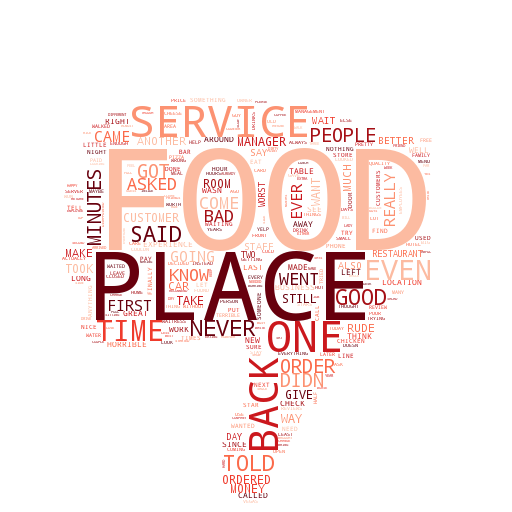

In [53]:
wc.to_image()

In [54]:
wc_5.recolor(color_func=color_func5, random_state=3)
wc_5.to_file("star5.png")

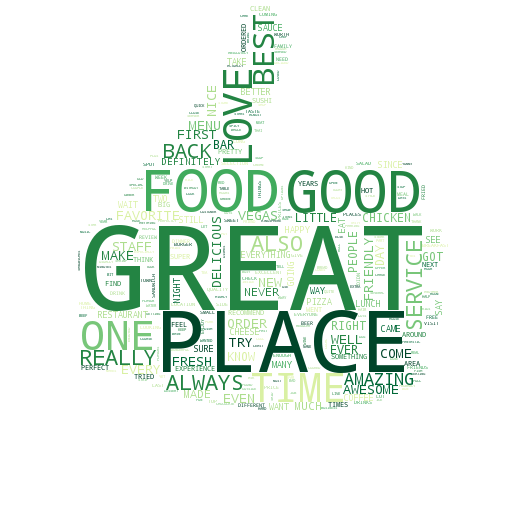

In [55]:
wc_5.to_image()